# Get the data

C:\Users\17245\AppData\Local\Temp\ipykernel_21972\2135353046.py:19: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("locality_results_bins.csv")


[0.4471747967479674, 0.7030604982206404, 0.8921018062397372, 0.7392073170731707, 0.5353799608471257, 0.9204356181934656, 1.0, 0.37096866096866093, 0.6515578318395219, 0.8150560597971169, 0.6749999999999999, 0.7788897784894582, 0.3191186922530206, 0.21889092017062764, 0.2156925540432346]
[0.3900956551202856, 0.4533413464371148, 0.906560325279537, 0.2352166826272539, 0.46282201405152223, 0.3799711596842744, 1.0, 0.1427774590425193, 0.07149640482973815, 0.0893705060371727, 0.08927512662838169, 0.16682494460272237, 0.10724460724460724, 0.12948348096466591, 0.10724460724460724]
[0.9004329004329004, 0.2510979184141768, 1.0, 0.6941232283698037, 0.9134199134199134, 0.922077922077922, 0.3294862772695285, 0.2595739372687078, 0.5576694020716791, 0.06496281496281496, 0.3523326322960358, 0.6884394196837015, 0.06496281496281496, 0.09744422244422245, 0.12057161874123436]
[0.08510294227745752, 0.13275303643724698, 0.3621052631578947, 0.059001349527665316, 0.368421052631579, 0.11790822131389321, 1.0, 0

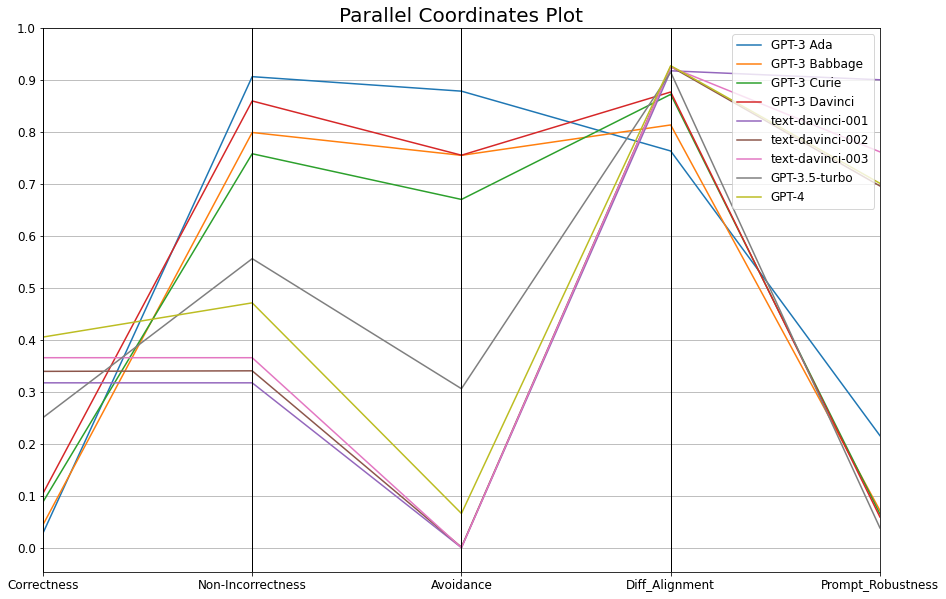

In [20]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import statistics as stats

def integral(Acc_by_diff, diff_bins):
    return sum(Acc_by_diff) # since bins are not continous

def Mass_deviation(Acc_by_diff, diff_bins):
    suma = 0
    df = 1
    for acc, bin_val in zip(Acc_by_diff, diff_bins):
        suma += acc * bin_val * df
    return suma

# Read the data from the CSV file
df = pd.read_csv("locality_results_bins.csv")


# variable definitions
dimensions = ['Correctness', 'Non-Incorrectness', 'Avoidance', 'Diff_Alignment', 'Prompt_Robustness']
num_vars = len(dimensions)

# Calculate the five variables for each engine
engine_data = []
for engine in ['GPT-3 Ada', 'GPT-3 Babbage', 'GPT-3 Curie', 'GPT-3 Davinci',
               'text-davinci-001', 'text-davinci-002', 'text-davinci-003',
               'GPT-3.5-turbo', 'GPT-4']:
    engine_df = df[df['engine'] == engine]
    total_count = len(engine_df)
    
    correctness = (engine_df['outcome'] == 'CORRECT').sum() / total_count 
    inv_incorrectness = (engine_df['outcome'] != 'INCORRECT').sum() / total_count 
    avoidance = (engine_df['outcome'] == 'AVOIDANCE').sum() / total_count 
    
    ### Calculate Diff_Alignment (generality)
    difficulty_bins = engine_df['difficulty_bin'].unique()
    # difficulty_bins = [b - 1 for b in difficulty_bins]
    accuracy_by_difficulty = engine_df.groupby('difficulty_bin')['outcome'].apply(lambda x: (x == 'CORRECT').sum() / len(x))
    
    capability = integral(accuracy_by_difficulty, difficulty_bins)
    mass = Mass_deviation(accuracy_by_difficulty, difficulty_bins)
    spread = (2 * mass - capability **2) ** 0.5
    
    """
    spread_sq =  spread ** 2
    spread_cnst_sq = capability * (max(difficulty_bins) - capability)
    spread_max_sq = 2 * capability * (max(difficulty_bins) - capability)
    diff_alignment = -1/((spread_sq - spread_cnst_sq)/(spread_max_sq - spread_cnst_sq)) ** 0.5 # generality
    """
    
    generality = 1/(spread + 0.00001) # 0.00001 for precision problem
    # diff_alignment = generality/(1+generality)
    diff_alignment = np.exp(-generality)
    ### prompt robustness
    # Calculate the accuracy for each template, considering only non-zero accuracy bins
    template_accuracies = []
    for template_id in engine_df['template_id'].unique():
        template_df = engine_df[engine_df['template_id'] == template_id]
        non_zero_accuracy_bins = template_df[template_df['outcome'] == 'CORRECT']['difficulty_bin'].unique()
        non_zero_accuracy_count = sum([(template_df['difficulty_bin'] == bin_val).sum() for bin_val in non_zero_accuracy_bins])
        accuracy_no_zero_correct_count = (template_df[template_df["difficulty_bin"].isin(list(non_zero_accuracy_bins))]['outcome'] == 'CORRECT').sum()
     
        if non_zero_accuracy_count==0:
            template_accuracy = 0
        else:
            template_accuracy = accuracy_no_zero_correct_count / (non_zero_accuracy_count)
            
        template_accuracies.append(template_accuracy)
    
    template_accuracies = [float(i)/max(template_accuracies) for i in template_accuracies]  # normalise into 0-1
    print(template_accuracies)
    
    prompt_robustness = 1 - (max(template_accuracies)-min(template_accuracies))
    # prompt_robustness = 1 - stats.variance(template_accuracies)
    engine_data.append([engine, correctness, inv_incorrectness, avoidance, diff_alignment, prompt_robustness])

# Create a DataFrame with the engine data
engine_data_df = pd.DataFrame(engine_data, columns=['Engine'] + dimensions)

# Create a parallel coordinates plot
plt.figure(figsize=(15, 10))
parallel_coordinates(engine_data_df, 'Engine', color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot", fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(range(len(dimensions)), dimensions, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid(True)
plt.show()

C:\Users\17245\AppData\Local\Temp\ipykernel_21972\844644177.py:67: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("addition_results_v3_bins.csv")
C:\Users\17245\AppData\Local\Temp\ipykernel_21972\844644177.py:68: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("anagram_results_bins.csv")
C:\Users\17245\AppData\Local\Temp\ipykernel_21972\844644177.py:69: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("locality_results_bins.csv")


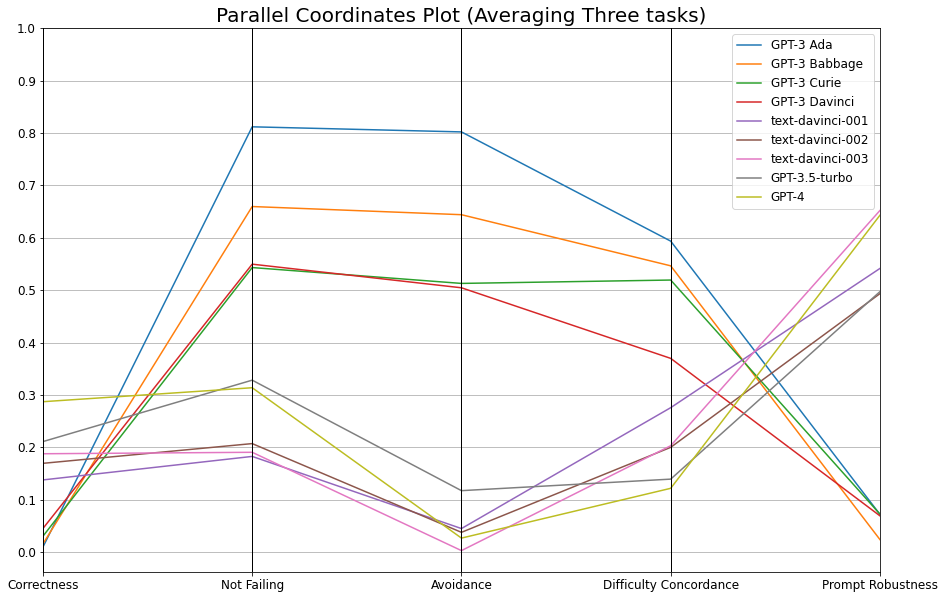

In [21]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import statistics as stats

def integral(Acc_by_diff, diff_bins):
    return sum(Acc_by_diff) # since bins are not continous

def Mass_deviation(Acc_by_diff, diff_bins):
    suma = 0
    df = 1
    for acc, bin_val in zip(Acc_by_diff, diff_bins):
        suma += acc * bin_val * df
    return suma

def calculate_engine_data(df):
    # Calculate the five variables for each engine
    engine_data = []
    for engine in ['GPT-3 Ada', 'GPT-3 Babbage', 'GPT-3 Curie', 'GPT-3 Davinci',
                   'text-davinci-001', 'text-davinci-002', 'text-davinci-003',
                   'GPT-3.5-turbo', 'GPT-4']:
        engine_df = df[df['engine'] == engine]
        total_count = len(engine_df)

        correctness = (engine_df['outcome'] == 'CORRECT').sum() / total_count 
        inv_incorrectness = (engine_df['outcome'] != 'INCORRECT').sum() / total_count 
        avoidance = (engine_df['outcome'] == 'AVOIDANCE').sum() / total_count 

        ### Calculate Diff_Alignment (generality)
        difficulty_bins = engine_df['difficulty_bin'].unique()
        accuracy_by_difficulty = engine_df.groupby('difficulty_bin')['outcome'].apply(lambda x: (x == 'CORRECT').sum() / len(x))

        capability = integral(accuracy_by_difficulty, difficulty_bins)
        mass = Mass_deviation(accuracy_by_difficulty, difficulty_bins)
        spread = (2 * mass - capability **2) ** 0.5

        generality = 1/(spread + 0.00001) # 0.00001 for precision problem
        diff_alignment = generality/(1+generality)

        ### prompt robustness
        template_accuracies = []

        for template_id in engine_df['template_id'].unique():
            template_df = engine_df[engine_df['template_id'] == template_id]
            non_zero_accuracy_bins = template_df[template_df['outcome'] == 'CORRECT']['difficulty_bin'].unique()
            non_zero_accuracy_count = sum([(template_df['difficulty_bin'] == bin_val).sum() for bin_val in non_zero_accuracy_bins])
            accuracy_no_zero_correct_count = (template_df[template_df["difficulty_bin"].isin(list(non_zero_accuracy_bins))]['outcome'] == 'CORRECT').sum()

            if non_zero_accuracy_count==0:
                template_accuracy = 0
            else:
                template_accuracy = accuracy_no_zero_correct_count / (non_zero_accuracy_count)

            template_accuracies.append(template_accuracy)

        template_accuracies = [float(i)/max(template_accuracies) for i in template_accuracies]  # normalise into 0-1

        prompt_robustness = 1 - (max(template_accuracies)-min(template_accuracies))
        
        engine_data.append([engine, correctness, inv_incorrectness, avoidance, diff_alignment, prompt_robustness])

    return engine_data

# Read the data from the CSV files
df1 = pd.read_csv("addition_results_v3_bins.csv")
df2 = pd.read_csv("anagram_results_bins.csv")
df3 = pd.read_csv("locality_results_bins.csv")

# Calculate engine data for each dataset
engine_data1 = calculate_engine_data(df1)
engine_data2 = calculate_engine_data(df2)
engine_data3 = calculate_engine_data(df3)

# Calculate the average engine data
average_engine_data = []
for i in range(len(engine_data1)):
    engine = engine_data1[i][0]
    avg_data = [(engine_data1[i][j] + engine_data2[i][j] + engine_data3[i][j]) / 3 for j in range(1, len(engine_data1[i]))]
    average_engine_data.append([engine] + avg_data)

# Create a DataFrame with the average engine data
dimensions = ['Correctness', 'Not Failing', 'Avoidance', 'Difficulty Concordance', 'Prompt Robustness']
average_engine_data_df = pd.DataFrame(average_engine_data, columns=['Engine'] + dimensions)

# Create a parallel coordinates plot
plt.figure(figsize=(15, 10))
parallel_coordinates(average_engine_data_df, 'Engine', color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot (Averaging Three tasks)", fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(range(len(dimensions)), dimensions, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid(True)
plt.savefig("reliability_measures.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import statistics as stats

def integral(Acc_by_diff, diff_bins):
    return sum(Acc_by_diff) # since bins are not continous

def Mass_deviation(Acc_by_diff, diff_bins):
    suma = 0
    df = 1
    for acc, bin_val in zip(Acc_by_diff, diff_bins):
        suma += acc * bin_val * df
    return suma

def calculate_engine_data(df):
    # Calculate the five variables for each engine
    engine_data = []
    for engine in ['GPT-3 Ada', 'GPT-3 Babbage', 'GPT-3 Curie', 'GPT-3 Davinci',
                   'text-davinci-001', 'text-davinci-002', 'text-davinci-003',
                   'GPT-3.5-turbo', 'GPT-4']:
        engine_df = df[df['engine'] == engine]
        total_count = len(engine_df)

        correctness = (engine_df['outcome'] == 'CORRECT').sum() / total_count 
        inv_incorrectness = (engine_df['outcome'] != 'INCORRECT').sum() / total_count 
        avoidance = (engine_df['outcome'] == 'AVOIDANCE').sum() / total_count 

        ### Calculate Diff_Alignment (generality)
        difficulty_bins = engine_df['difficulty_bin'].unique()
        accuracy_by_difficulty = engine_df.groupby('difficulty_bin')['outcome'].apply(lambda x: (x == 'CORRECT').sum() / len(x))

        capability = integral(accuracy_by_difficulty, difficulty_bins)
        mass = Mass_deviation(accuracy_by_difficulty, difficulty_bins)
        spread = (2 * mass - capability **2) ** 0.5

        generality = 1/(spread + 0.00001) # 0.00001 for precision problem
        diff_alignment = generality/(1+generality)

        ### prompt robustness
        template_accuracies = []

        for template_id in engine_df['template_id'].unique():
            template_df = engine_df[engine_df['template_id'] == template_id]
            non_zero_accuracy_bins = template_df[template_df['outcome'] == 'CORRECT']['difficulty_bin'].unique()
            non_zero_accuracy_count = sum([(template_df['difficulty_bin'] == bin_val).sum() for bin_val in non_zero_accuracy_bins])
            accuracy_no_zero_correct_count = (template_df[template_df["difficulty_bin"].isin(list(non_zero_accuracy_bins))]['outcome'] == 'CORRECT').sum()

            if non_zero_accuracy_count==0:
                template_accuracy = 0
            else:
                template_accuracy = accuracy_no_zero_correct_count / (non_zero_accuracy_count)

            template_accuracies.append(template_accuracy)
    
    
        p = stats.mean(template_accuracies)
        mean_sd = (p * (1-p)) ** 0.5 # because accuracy follows a Bernoulli distribution
        # template_accuracies = [float(i) for i in template_accuracies]  # normalise into 0-1

        aux = (max(template_accuracies)-min(template_accuracies))/mean_sd
        # print(engine)
        # print("mean ACC:", round(p,2), "max(ACCs)-min(ACCs):", round(max(template_accuracies)-min(template_accuracies),2), "SD_Bernoulli", round(mean_sd, 3))

        engine_data.append([engine, correctness, inv_incorrectness, avoidance, diff_alignment, prompt_robustness])

    return engine_data

# Read the data from the CSV files
df1 = pd.read_csv("addition_results_v3_bins.csv")
df2 = pd.read_csv("anagram_results_bins.csv")
df3 = pd.read_csv("locality_results_bins.csv")

# Calculate engine data for each dataset
engine_data1 = calculate_engine_data(df1)
engine_data2 = calculate_engine_data(df2)
engine_data3 = calculate_engine_data(df3)

# Calculate the average engine data
average_engine_data = []
for i in range(len(engine_data1)):
    engine = engine_data1[i][0]
    avg_data = [(engine_data1[i][j] + engine_data2[i][j] + engine_data3[i][j]) / 3 for j in range(1, len(engine_data1[i]))]
    average_engine_data.append([engine] + avg_data)

### Make transformation for prompt robustness
for i, lis in enumerate(average_engine_data):
    print(lis)
    aux = lis[-1] 
    prompt_robustness = 1 - aux / (1+aux)
    average_engine_data[i][-1] = prompt_robustness
    
# Create a DataFrame with the average engine data
dimensions = ['Correctness', 'Not Failing', 'Avoidance', 'Difficulty Concordance', 'Prompt Robustness']
average_engine_data_df = pd.DataFrame(average_engine_data, columns=['Engine'] + dimensions)

# Create a parallel coordinates plot
plt.figure(figsize=(15, 10))
parallel_coordinates(average_engine_data_df, 'Engine', color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot (Averaging Three tasks)", fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(range(len(dimensions)), dimensions, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid(True)
plt.savefig("reliability_measures.pdf", format="pdf", bbox_inches="tight")
plt.show()

C:\Users\17245\AppData\Local\Temp\ipykernel_21972\346738097.py:76: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("addition_results_v3_bins.csv")
C:\Users\17245\AppData\Local\Temp\ipykernel_21972\346738097.py:77: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("anagram_results_bins.csv")
C:\Users\17245\AppData\Local\Temp\ipykernel_21972\346738097.py:78: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("locality_results_bins.csv")


['GPT-3 Ada', 0.009729734444657762, 0.8117594838165787, 0.5935556503327669, 0.40594659280446327]
['GPT-3 Babbage', 0.015590498768967296, 0.6595903050325037, 0.54639440420515, 0.5942965925391949]
['GPT-3 Curie', 0.030270633033679287, 0.5430984718114389, 0.5192667153976039, 0.5814311192393719]
['GPT-3 Davinci', 0.0450752487781186, 0.5495640199188384, 0.3697385861573544, 0.6450040117882344]
['text-davinci-001', 0.13771539641920064, 0.18259141581353974, 0.2756548616325108, 0.3971897311338603]
['text-davinci-002', 0.16939556627041133, 0.2070556146605793, 0.1999183469526623, 0.5215984871961901]
['text-davinci-003', 0.1876833649237524, 0.19047088446922966, 0.20302017346671952, 0.4543844262147673]
['GPT-3.5-turbo', 0.2109089370051319, 0.32814854854284353, 0.13923552411637044, 0.6170375067351306]
['GPT-4', 0.2870277637151848, 0.3136880757684233, 0.12170105096328356, 0.44398141705553745]


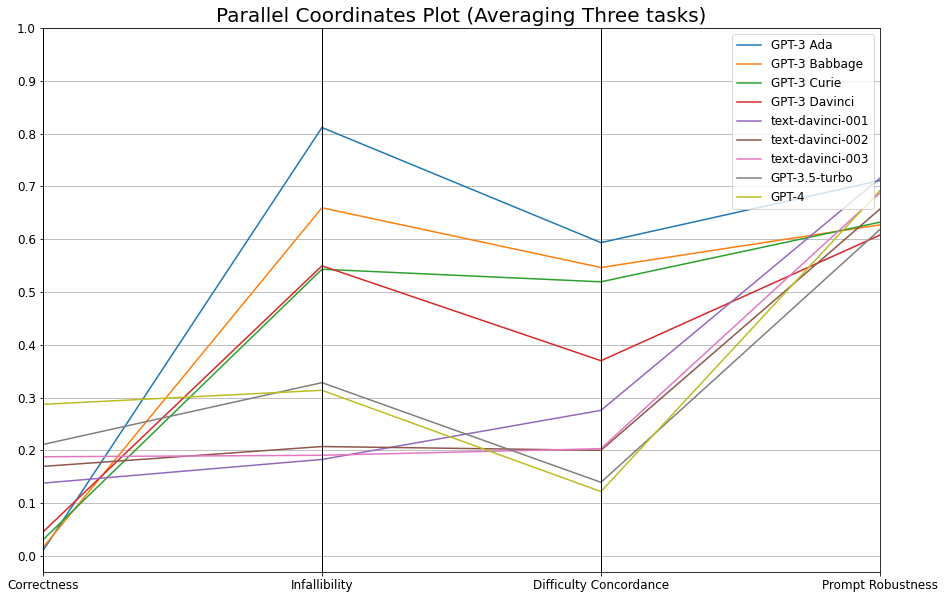

In [69]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import statistics as stats

def integral(Acc_by_diff, diff_bins):
    return sum(Acc_by_diff) # since bins are not continous

def Mass_deviation(Acc_by_diff, diff_bins):
    suma = 0
    df = 1
    for acc, bin_val in zip(Acc_by_diff, diff_bins):
        suma += acc * bin_val * df
    return suma

def calculate_engine_data(df):
    # Calculate the five variables for each engine
    engine_data = []
    for engine in ['GPT-3 Ada', 'GPT-3 Babbage', 'GPT-3 Curie', 'GPT-3 Davinci',
                   'text-davinci-001', 'text-davinci-002', 'text-davinci-003',
                   'GPT-3.5-turbo', 'GPT-4']:
        engine_df = df[df['engine'] == engine]
        total_count = len(engine_df)

        correctness = (engine_df['outcome'] == 'CORRECT').sum() / total_count 
        inv_incorrectness = (engine_df['outcome'] != 'INCORRECT').sum() / total_count 
        avoidance = (engine_df['outcome'] == 'AVOIDANCE').sum() / total_count 

        ### Calculate Diff_Alignment (generality)
        difficulty_bins = engine_df['difficulty_bin'].unique()
        accuracy_by_difficulty = engine_df.groupby('difficulty_bin')['outcome'].apply(lambda x: (x == 'CORRECT').sum() / len(x))

        capability = integral(accuracy_by_difficulty, difficulty_bins)
        mass = Mass_deviation(accuracy_by_difficulty, difficulty_bins)
        spread = (2 * mass - capability **2) ** 0.5

        generality = 1/(spread + 0.00001) # 0.00001 for precision problem
        diff_alignment = generality/(1+generality)

        ### prompt robustness
        bin_p_sensitivities = []

        for bin_val in difficulty_bins:
            bin_df = engine_df[engine_df['difficulty_bin'] == bin_val]
            
            if (bin_df["outcome"]=="CORRECT").sum() !=0:  # remove bins with 0 accuracy
                template_accuracies = []

                for template_id in bin_df['template_id'].unique():
                    template_df = bin_df[bin_df['template_id'] == template_id]
                    correct_count = (template_df['outcome'] == "CORRECT").sum()

                    if correct_count==0:
                        template_accuracy = 0
                    else:
                        template_accuracy = correct_count / len(template_df['difficulty_bin'] == bin_val)


                    template_accuracies.append(template_accuracy)

                p = np.mean(template_accuracies)
                mean_sd = (p * (1-p)) ** 0.5 # because accuracy follows a Bernoulli distribution

                p_sensitivity = (max(template_accuracies)-min(template_accuracies))/mean_sd
                bin_p_sensitivities.append(p_sensitivity)

        avg_p_sensitivity = np.mean(bin_p_sensitivities)

        engine_data.append([engine, correctness, inv_incorrectness, diff_alignment, avg_p_sensitivity])

    return engine_data

# Read the data from the CSV files
df1 = pd.read_csv("addition_results_v3_bins.csv")
df2 = pd.read_csv("anagram_results_bins.csv")
df3 = pd.read_csv("locality_results_bins.csv")

# Calculate engine data for each dataset
engine_data1 = calculate_engine_data(df1)
engine_data2 = calculate_engine_data(df2)
engine_data3 = calculate_engine_data(df3)

# Calculate the average engine data
average_engine_data = []
for i in range(len(engine_data1)):
    engine = engine_data1[i][0]
    avg_data = [(engine_data1[i][j] + engine_data2[i][j] + engine_data3[i][j]) / 3 for j in range(1, len(engine_data1[i]))]
    average_engine_data.append([engine] + avg_data)

### Make transformation for prompt robustness
for i, lis in enumerate(average_engine_data):
    print(lis)
    p_sens = lis[-1] 
    prompt_robustness = 1 - p_sens / (1+p_sens)
    average_engine_data[i][-1] = prompt_robustness
    
# Create a DataFrame with the average engine data
dimensions = ['Correctness', 'Infallibility', 'Difficulty Concordance', 'Prompt Robustness']
average_engine_data_df = pd.DataFrame(average_engine_data, columns=['Engine'] + dimensions)

# Create a parallel coordinates plot
plt.figure(figsize=(15, 10))
parallel_coordinates(average_engine_data_df, 'Engine', color=plt.cm.tab10.colors)
plt.title("Parallel Coordinates Plot (Averaging Three tasks)", fontsize=20)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(range(len(dimensions)), dimensions, fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=12)
plt.grid(True)
plt.savefig("reliability_measures.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [68]:
#average_engine_data_df.to_csv("reliability_measures.csv")